In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


In [2]:
df=pd.read_csv("Walmart.csv")
print(df)

       invoice_id   Branch         City                category unit_price  \
0               1  WALM003  San Antonio       Health and beauty     $74.69   
1               2  WALM048    Harlingen  Electronic accessories     $15.28   
2               3  WALM067  Haltom City      Home and lifestyle     $46.33   
3               4  WALM064      Bedford       Health and beauty     $58.22   
4               5  WALM013       Irving       Sports and travel     $86.31   
...           ...      ...          ...                     ...        ...   
10046        9996  WALM056      Rowlett     Fashion accessories        $37   
10047        9997  WALM030   Richardson      Home and lifestyle        $58   
10048        9998  WALM050     Victoria     Fashion accessories        $52   
10049        9999  WALM032        Tyler      Home and lifestyle        $79   
10050       10000  WALM069     Rockwall     Fashion accessories        $62   

       quantity        date      time payment_method  rating  p

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB
None


In [4]:
print(df.head())

   invoice_id   Branch         City                category unit_price  \
0           1  WALM003  San Antonio       Health and beauty     $74.69   
1           2  WALM048    Harlingen  Electronic accessories     $15.28   
2           3  WALM067  Haltom City      Home and lifestyle     $46.33   
3           4  WALM064      Bedford       Health and beauty     $58.22   
4           5  WALM013       Irving       Sports and travel     $86.31   

   quantity        date      time payment_method  rating  profit_margin  
0       7.0  05-01-2019  13.08.00        Ewallet     9.1           0.48  
1       5.0  08-03-2019  10.29.00           Cash     9.6           0.48  
2       7.0  03-03-2019  13.23.00    Credit card     7.4           0.33  
3       8.0  27-01-2019  20.33.00        Ewallet     8.4           0.33  
4       7.0  08-02-2019  10.37.00        Ewallet     5.3           0.48  


In [5]:
df.dropna(inplace=True)

Converting Data type


In [6]:
df['unit_price'] = df['unit_price'].replace('[\$,]', '', regex=True).astype(float)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')  
df['time'] = pd.to_datetime(df['time'], format='%H.%M.%S').dt.hour 


Feature Engineering

In [7]:
df['total_sales'] = df['unit_price'] * df['quantity']

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10020 entries, 0 to 10050
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      10020 non-null  int64         
 1   Branch          10020 non-null  object        
 2   City            10020 non-null  object        
 3   category        10020 non-null  object        
 4   unit_price      10020 non-null  float64       
 5   quantity        10020 non-null  float64       
 6   date            10020 non-null  datetime64[ns]
 7   time            10020 non-null  int32         
 8   payment_method  10020 non-null  object        
 9   rating          10020 non-null  float64       
 10  profit_margin   10020 non-null  float64       
 11  total_sales     10020 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1), object(4)
memory usage: 978.5+ KB
None


In [9]:
print(df.head())

   invoice_id   Branch         City                category  unit_price  \
0           1  WALM003  San Antonio       Health and beauty       74.69   
1           2  WALM048    Harlingen  Electronic accessories       15.28   
2           3  WALM067  Haltom City      Home and lifestyle       46.33   
3           4  WALM064      Bedford       Health and beauty       58.22   
4           5  WALM013       Irving       Sports and travel       86.31   

   quantity       date  time payment_method  rating  profit_margin  \
0       7.0 2019-01-05    13        Ewallet     9.1           0.48   
1       5.0 2019-03-08    10           Cash     9.6           0.48   
2       7.0 2019-03-03    13    Credit card     7.4           0.33   
3       8.0 2019-01-27    20        Ewallet     8.4           0.33   
4       7.0 2019-02-08    10        Ewallet     5.3           0.48   

   total_sales  
0       522.83  
1        76.40  
2       324.31  
3       465.76  
4       604.17  


Top-Selling Product categories

C:\Users\sahil chouhan\AppData\Local\Temp\ipykernel_10800\4246151994.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['category'], y=df['total_sales'], estimator=np.sum, ci=None, palette='viridis')
C:\Users\sahil chouhan\AppData\Local\Temp\ipykernel_10800\4246151994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['category'], y=df['total_sales'], estimator=np.sum, ci=None, palette='viridis')


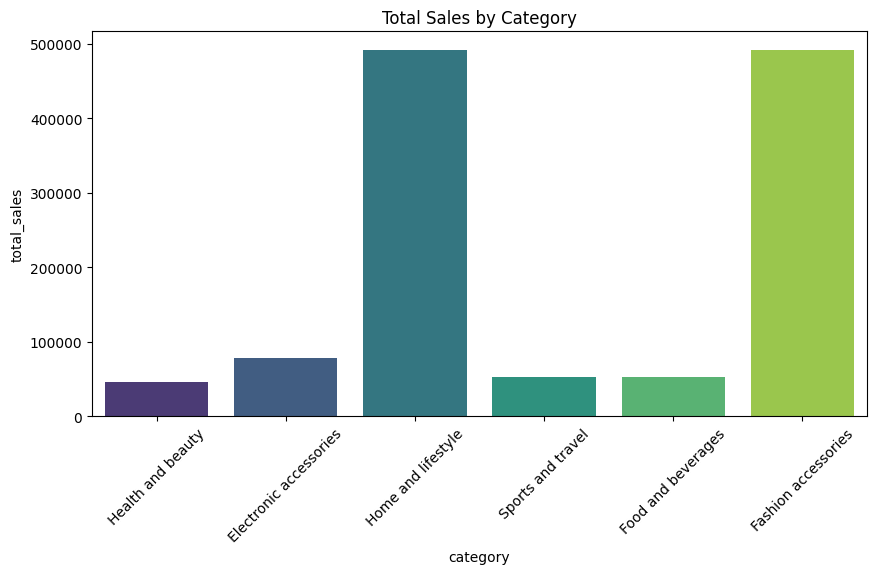

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['category'], y=df['total_sales'], estimator=np.sum, ci=None, palette='viridis')
plt.xticks(rotation=45)
plt.title("Total Sales by Category")
plt.show()

Sales Trends Over Time

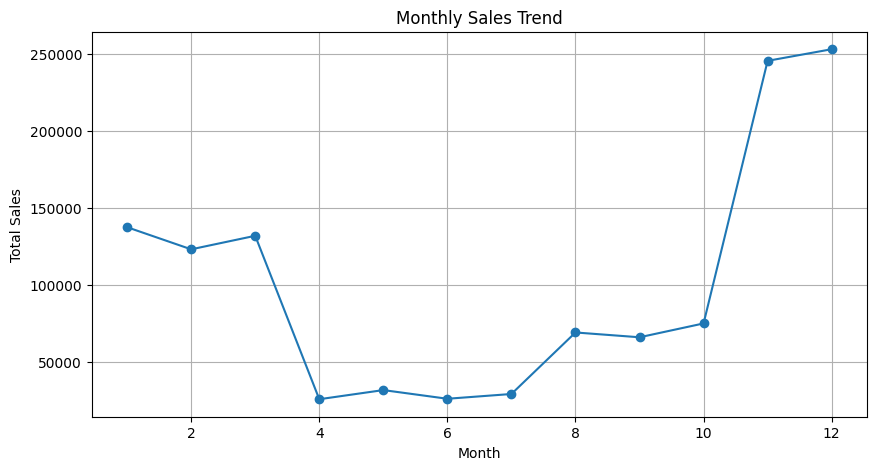

In [11]:
df.groupby(df['date'].dt.month)['total_sales'].sum().plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

Preferred Payment Methods

C:\Users\sahil chouhan\AppData\Local\Temp\ipykernel_10800\1143091675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['payment_method'], palette='coolwarm')


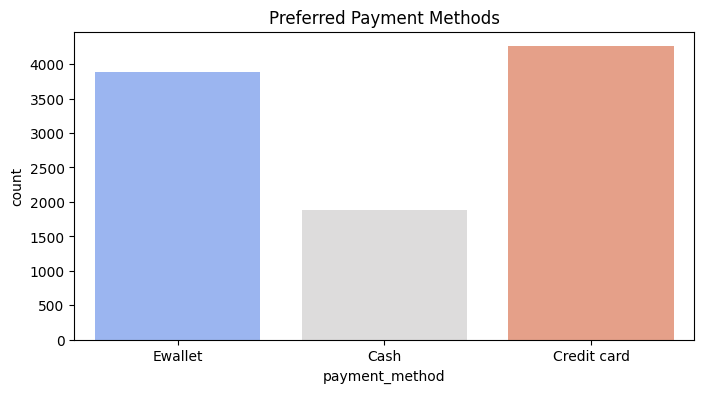

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['payment_method'], palette='coolwarm')
plt.title("Preferred Payment Methods")
plt.show()

Peak Sales Hours

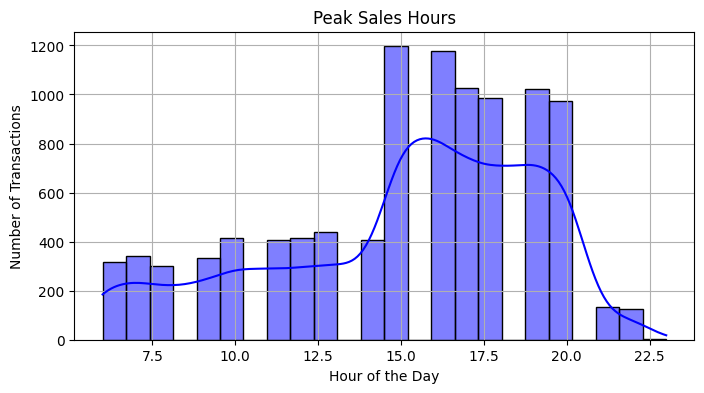

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(df['time'], bins=24, kde=True, color='blue')
plt.title("Peak Sales Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

 Branch-Wise Sales Performance

C:\Users\sahil chouhan\AppData\Local\Temp\ipykernel_10800\2685278002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Branch'], y=df['total_sales'], estimator=np.sum, palette='magma')


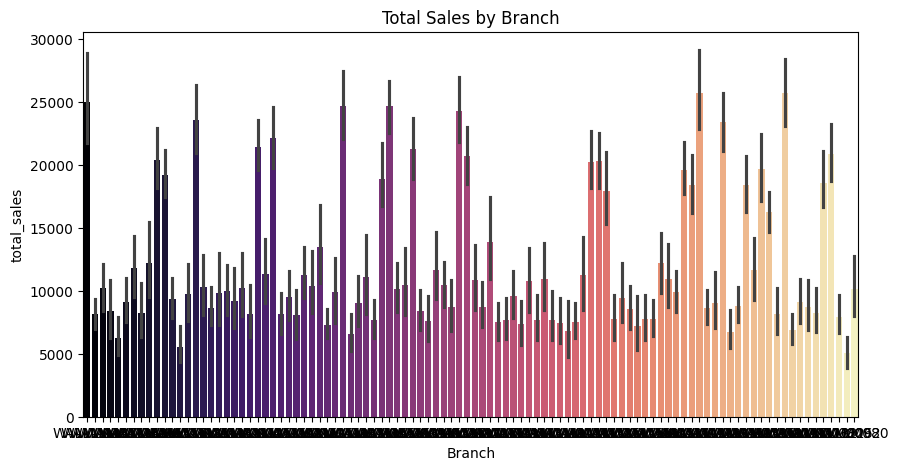

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Branch'], y=df['total_sales'], estimator=np.sum, palette='magma')
plt.title("Total Sales by Branch")
plt.show()


 Customer Ratings vs. Sales

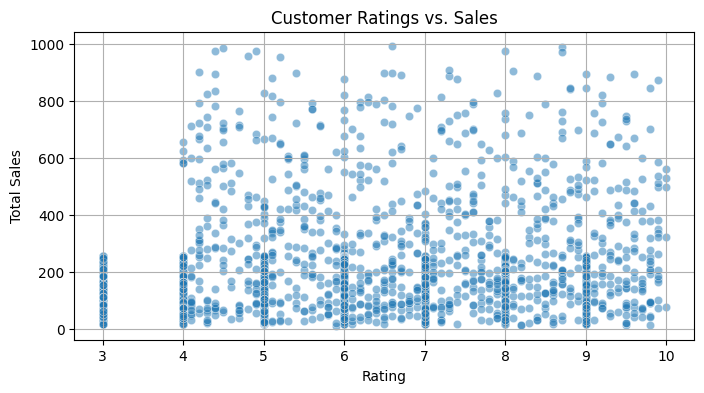

In [15]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['rating'], y=df['total_sales'], alpha=0.5)
plt.title("Customer Ratings vs. Sales")
plt.xlabel("Rating")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


 DInitializeash App

In [22]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("E-commerce Sales Dashboard", style={'textAlign': 'center'}),
    
    dcc.Graph(
        id='total-sales-trend',
        figure=px.line(df.groupby(df['date'].dt.month)['total_sales'].sum().reset_index(),
                       x='date', y='total_sales', title='Monthly Sales Trend')
    ),
    
    dcc.Graph(
        id='category-sales',
        figure=px.bar(df.groupby('category')['total_sales'].sum().reset_index(),
                      x='category', y='total_sales', title='Top-Selling Categories', color='total_sales')
    ),
    
    dcc.Graph(
        id='payment-methods',
        figure=px.pie(df, names='payment_method', title='Preferred Payment Methods')
    ),
    
    dcc.Graph(
        id='peak-hours',
        figure=px.histogram(df, x='time', nbins=24, title='Peak Sales Hours', color_discrete_sequence=['blue'])
    ),
    
    dcc.Graph(
        id='branch-sales',
        figure=px.bar(df.groupby('Branch')['total_sales'].sum().reset_index(),
                      x='Branch', y='total_sales', title='Branch-Wise Sales', color='total_sales')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


Top Performing Categories

In [17]:
import pandas as pd 


In [18]:
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
print("Top Selling Categories:\n", category_sales)


Top Selling Categories:
 category
Home and lifestyle        491996.06
Fashion accessories       491833.90
Electronic accessories     78175.03
Food and beverages         53471.28
Sports and travel          52497.93
Health and beauty          46851.18
Name: total_sales, dtype: float64


 Payment Method Preferences

In [19]:
payment_counts = df['payment_method'].value_counts()
print("\nPreferred Payment Methods:\n", payment_counts)


Preferred Payment Methods:
 payment_method
Credit card    4259
Ewallet        3881
Cash           1880
Name: count, dtype: int64


Branch-Wise Performance

In [20]:
branch_sales = df.groupby('Branch')['total_sales'].sum().sort_values(ascending=False)
print("\nBranch-Wise Sales Performance:\n", branch_sales)


Branch-Wise Sales Performance:
 Branch
WALM074    25732.42
WALM009    25712.34
WALM003    25001.56
WALM030    24690.60
WALM058    24650.37
             ...   
WALM039     6769.33
WALM033     6572.91
WALM013     6237.11
WALM031     5568.84
WALM092     5038.90
Name: total_sales, Length: 100, dtype: float64


Recommendations

In [21]:
print("\n**Business Recommendations:**")
print("1. Increase stock for top-selling categories like Health & Beauty and Electronics.")
print("2. Introduce special offers on Credit Card transactions to encourage high-value purchases.")
print("3. Offer early-morning discounts to boost sales in non-peak hours.")
print("4. Target underperforming branches with local marketing campaigns.")




**Business Recommendations:**
1. Increase stock for top-selling categories like Health & Beauty and Electronics.
2. Introduce special offers on Credit Card transactions to encourage high-value purchases.
3. Offer early-morning discounts to boost sales in non-peak hours.
4. Target underperforming branches with local marketing campaigns.
